<a href="https://colab.research.google.com/github/AditHash/exam-cheating-prediction-from-logs/blob/main/elitmus_proctoring_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_questions = pd.read_csv("/content/drive/MyDrive/elitmus-data/new/archived_question_results_ca.csv")
df_activities = pd.read_csv("/content/drive/MyDrive/elitmus-data/new/user_activities_ca.csv")
df_cheating = pd.read_csv("/content/drive/MyDrive/elitmus-data/new/cheating_case_user_id.csv")
df_noncheating = pd.read_csv("/content/drive/MyDrive/elitmus-data/new/non_cheating_case_user_id.csv")

# Step 1:
### Explarotory Data Analysis


In [ ]:
df_questions.head()

,elitmus_id,user_id,question_result_id,question_id,skipped,answered,correct,seconds_taken,avg_time
0,4822695,94315,6907531,354,0,True,False,75,147.7100
1,4822695,94315,6907532,355,1,NaN,False,109,98.5097
2,4822695,94315,6907533,357,0,True,False,65,150.4750
3,4822695,94315,6907534,356,0,True,True,22,87.6549
4,4822695,94315,6907535,351,1,NaN,False,3,71.2913


In [ ]:
# removing user id field as its confusing
df_questions = df_questions.drop(columns=['user_id'])

In [ ]:
df_questions.head()

,elitmus_id,question_result_id,question_id,skipped,answered,correct,seconds_taken,avg_time
0,4822695,6907531,354,0,True,False,75,147.7100
1,4822695,6907532,355,1,NaN,False,109,98.5097
2,4822695,6907533,357,0,True,False,65,150.4750
3,4822695,6907534,356,0,True,True,22,87.6549
4,4822695,6907535,351,1,NaN,False,3,71.2913


In [ ]:
# checking how many answered = true

print(df_questions['answered'].value_counts())
print((df_questions['answered'] == True).sum())
print((df_questions['answered'] == True).mean() * 100)

answered
True    11926
Name: count, dtype: int64
11926
78.04973821989529


In [ ]:
# The NaN values in the answered column are being ignored by .value_counts() and == True, which is why we're only seeing True values and no False
print((df_questions['answered'] == False).sum())
print((df_questions['answered'] == False).mean() * 100)

0
0.0


In [ ]:
# To treat NaN as False, we can fill them first
df_questions['answered'] = df_questions['answered'].fillna(False)

<ipython-input-8-56902fcb214e>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_questions['answered'] = df_questions['answered'].fillna(False)


In [ ]:
# Now we can see true and false counts
print(df_questions['answered'].value_counts())
print((df_questions['answered'] == False).sum())
print((df_questions['answered'] == False).mean() * 100)

answered
True     11926
False     3354
Name: count, dtype: int64
3354
21.950261780104714


In [ ]:
# Now lets check for correct coloumn
print(df_questions['correct'].value_counts())

correct
False    10419
True      4861
Name: count, dtype: int64


In [ ]:
# now lets check for skipped coloumn
print(df_questions['skipped'].value_counts())

skipped
0     5867
1     4054
2     2460
3     1235
4      693
5      336
6      212
7      143
8       91
9       55
10      34
11      24
12      17
15      11
13      10
14      10
18       5
21       4
19       3
16       3
17       3
22       3
28       2
20       2
33       1
24       1
23       1
Name: count, dtype: int64


In [ ]:
df_questions

,elitmus_id,question_result_id,question_id,skipped,answered,correct,seconds_taken,avg_time
0,4822695,6907531,354,0,True,False,75,147.7100
1,4822695,6907532,355,1,False,False,109,98.5097
2,4822695,6907533,357,0,True,False,65,150.4750
3,4822695,6907534,356,0,True,True,22,87.6549
4,4822695,6907535,351,1,False,False,3,71.2913
...,...,...,...,...,...,...,...,...
15275,5626897,7982336,5721,1,False,False,2,128.7730
15276,5626897,7982337,5725,2,False,False,3,35.7273
15277,5626897,7982338,5728,1,False,False,1,59.8182
15278,5626897,7982339,5726,0,False,False,31,45.0000


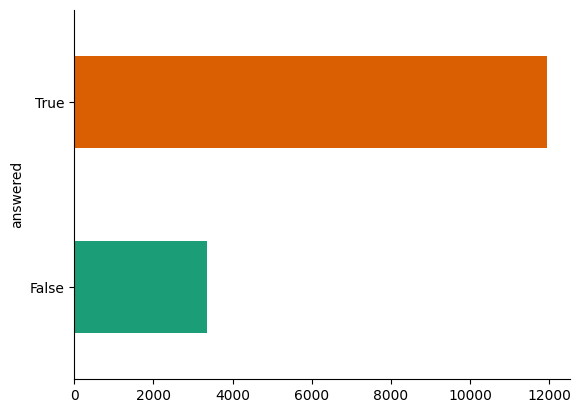

In [ ]:
# graph for answered

from matplotlib import pyplot as plt
import seaborn as sns
df_questions.groupby('answered').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

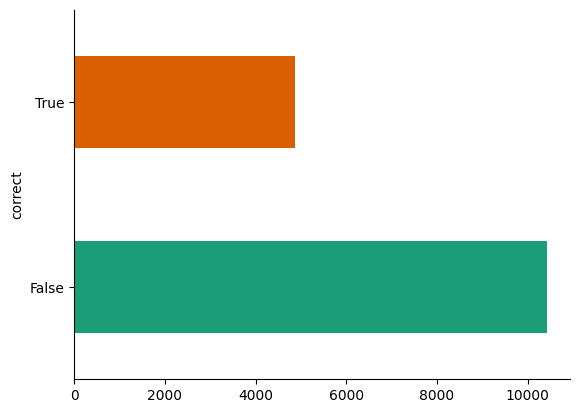

In [ ]:
# graph for correct

from matplotlib import pyplot as plt
import seaborn as sns
df_questions.groupby('correct').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### from question df, this the info about every coloumn

- elitmus_id - unique id for candidates
- question_results_id - some kind of unique id ??
- question_id - unique question id
- skipped - probably how many questions skipped for reaching the question
- answered - categorical feature - true/false
- correct - categorical feature - true/false
- seconds_taken - seconds taken to answer the question
- avg_time - avarage taken ??

In [ ]:
df_activities.head()

,elitmus_id,user_id,user_activity_id,activity,created_at,question_result_id
0,4822695,94315,35384033,login,2024-03-02 06:14:49 -0800,NaN
1,4822695,94315,35384035,viewed,2024-03-02 06:14:50 -0800,6907531.0
2,4822695,94315,35384048,answered,2024-03-02 06:15:22 -0800,6907531.0
3,4822695,94315,35384050,moved to next question,2024-03-02 06:15:32 -0800,6907531.0
4,4822695,94315,35384051,viewed,2024-03-02 06:15:32 -0800,6907532.0


In [ ]:
# removing user id field as its confusing
df_activities = df_activities.drop(columns=['user_id'])

In [ ]:
# checking NaN values in question_results_id
print(df_activities['question_result_id'].isnull().sum())

396


In [ ]:
# check the NaN rows
nan_rows = df_activities[df_activities['question_result_id'].isna()]
nan_rows

,elitmus_id,user_activity_id,activity,created_at,question_result_id
0,4822695,35384033,login,2024-03-02 06:14:49 -0800,NaN
31,4822695,35425128,login,2024-03-02 20:40:35 -0800,NaN
650,4822695,35619829,timeout,2024-03-02 22:45:37 -0800,NaN
651,4822695,37736979,login,2024-06-22 01:33:03 -0700,NaN
948,4899148,35205039,login,2024-02-17 20:45:58 -0800,NaN
...,...,...,...,...,...
84073,5626824,41031165,timeout,2025-03-31 23:37:36 -0700,NaN
84074,5626824,41026790,login,2025-03-31 12:00:59 -0700,NaN
84113,5626831,41026962,login,2025-03-31 21:35:27 -0700,NaN
84357,5626831,41031214,timeout,2025-03-31 23:40:28 -0700,NaN


In [ ]:
# Convert 'question_result_id' to integer, handling NaN and floats
df_activities['question_result_id'] = df_activities['question_result_id'].fillna(0)
df_activities['question_result_id'] = df_activities['question_result_id'].astype(int)
df_activities

,elitmus_id,user_activity_id,activity,created_at,question_result_id
0,4822695,35384033,login,2024-03-02 06:14:49 -0800,0
1,4822695,35384035,viewed,2024-03-02 06:14:50 -0800,6907531
2,4822695,35384048,answered,2024-03-02 06:15:22 -0800,6907531
3,4822695,35384050,moved to next question,2024-03-02 06:15:32 -0800,6907531
4,4822695,35384051,viewed,2024-03-02 06:15:32 -0800,6907532
...,...,...,...,...,...
84497,5626897,41030599,viewed,2025-03-31 23:11:50 -0700,7982340
84498,5626897,41030600,skipped,2025-03-31 23:11:52 -0700,7982340
84499,5626897,41030601,viewed,2025-03-31 23:11:52 -0700,7982281
84500,5626897,41030605,skipped,2025-03-31 23:12:00 -0700,7982281


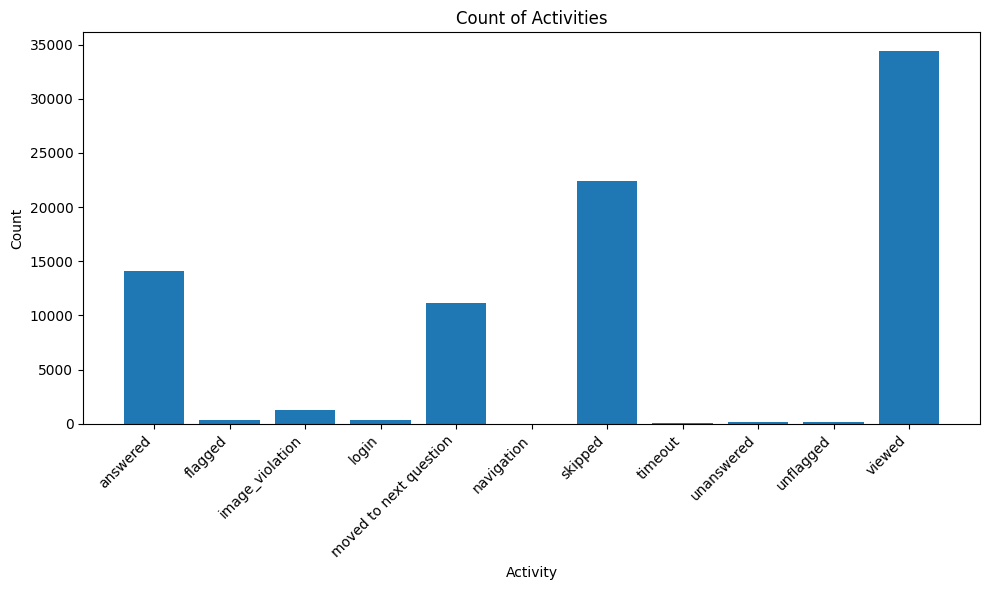

In [ ]:
# plot to get the count of activity

import matplotlib.pyplot as plt

# Group the data by activity and count the occurrences
activity_counts = df_activities.groupby('activity')['activity'].count()

# Create a bar plot of the activity counts
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(activity_counts.index, activity_counts.values)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Count of Activities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# ✅ Parse created_at as datetime
# This is needed because we may later calculate "time gaps" between activities.
df_activities['created_at'] = pd.to_datetime(df_activities['created_at'])
df_activities

<ipython-input-21-4de2c5936bc5>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_activities['created_at'] = pd.to_datetime(df_activities['created_at'])


,elitmus_id,user_activity_id,activity,created_at,question_result_id
0,4822695,35384033,login,2024-03-02 06:14:49-08:00,0
1,4822695,35384035,viewed,2024-03-02 06:14:50-08:00,6907531
2,4822695,35384048,answered,2024-03-02 06:15:22-08:00,6907531
3,4822695,35384050,moved to next question,2024-03-02 06:15:32-08:00,6907531
4,4822695,35384051,viewed,2024-03-02 06:15:32-08:00,6907532
...,...,...,...,...,...
84497,5626897,41030599,viewed,2025-03-31 23:11:50-07:00,7982340
84498,5626897,41030600,skipped,2025-03-31 23:11:52-07:00,7982340
84499,5626897,41030601,viewed,2025-03-31 23:11:52-07:00,7982281
84500,5626897,41030605,skipped,2025-03-31 23:12:00-07:00,7982281


### from activities df, this the info about every coloumn

- elitmus_id - unique id for candidates
- user_activity_id - some kind of unique id for user activity
- activity - type of activity
- created_at - timestamp of activity
- question_results_id - some kind of unique id ??

In [ ]:
df_cheating

,user_id
0,4822695
1,4867000
2,4899148
3,4936028
4,4928896
...,...
135,5596280
136,5609151
137,5610430
138,5611139


In [ ]:
df_noncheating

,user_id
0,5493368
1,5493484
2,5487545
3,5493656
4,5493419
...,...
94,5626845
95,5626850
96,5626851
97,5626854


In [ ]:
# change the user_id coloumn to elitmus_id coloumn for both df_cheating and df_noncheating
df_cheating = df_cheating.rename(columns={'user_id': 'elitmus_id'})
df_noncheating = df_noncheating.rename(columns={'user_id': 'elitmus_id'})

In [ ]:
# combine df_cheating and df_noncheating to make a single df
# where there will be elitmus_id and is cheating true and false

import pandas as pd
# Create a 'is_cheating' column in both DataFrames
df_cheating['is_cheating'] = True
df_noncheating['is_cheating'] = False

# Combine the DataFrames
df_combined = pd.concat([df_cheating, df_noncheating], ignore_index=True)

# Display the combined DataFrame
df_combined


,elitmus_id,is_cheating
0,4822695,True
1,4867000,True
2,4899148,True
3,4936028,True
4,4928896,True
...,...,...
234,5626845,False
235,5626850,False
236,5626851,False
237,5626854,False


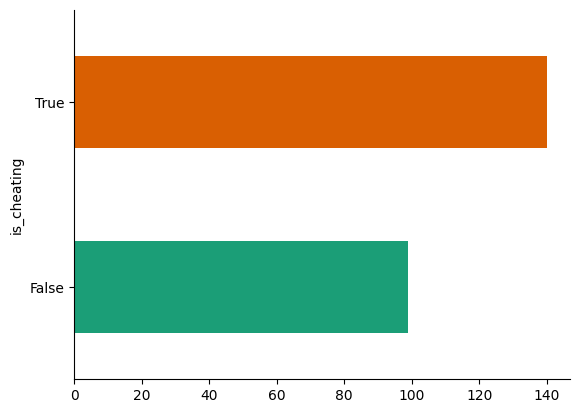

In [ ]:
# count of is_cheating

from matplotlib import pyplot as plt
import seaborn as sns
df_combined.groupby('is_cheating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### from combined df, this the info about every coloumn

- elitmus_id - unique id for candidates
- is_cheating - true/false

# Step 2:
### Feature Engineering

In [ ]:
# Create Features from question DataFrame
# Group by elitmus_id and generate useful statistical features:

question_features = df_questions.groupby("elitmus_id").agg({
    "question_result_id": "count",                           # total number of questions
    "answered": lambda x: (x == True).sum(),                 # number of answered questions
    "correct": lambda x: (x == True).sum(),                  # number of correct answers
    "seconds_taken": ["mean", "std", "min", "max"],          # time statistics
    "avg_time": "mean",                                      # mean of avg_time
    "skipped": "sum"                                         # number of skipped questions
}).reset_index()

# Fix multi-level columns
question_features.columns = ["elitmus_id", "total_qs", "answered_qs", "correct_qs",
                              "time_mean", "time_std", "time_min", "time_max",
                              "avg_time", "total_skipped"]


In [ ]:
# Create Derived Features
# Add some useful ratios:

question_features["accuracy"] = question_features["correct_qs"] / question_features["answered_qs"].replace(0, 1)
question_features["attempt_rate"] = question_features["answered_qs"] / question_features["total_qs"].replace(0, 1)
question_features["skip_rate"] = question_features["total_skipped"] / question_features["total_qs"].replace(0, 1)

# Optional: total time spent answering
question_features["total_time"] = question_features["time_mean"] * question_features["answered_qs"]
question_features["avg_time_per_qs"] = question_features["total_time"] / question_features["total_qs"].replace(0, 1)

question_features

,elitmus_id,total_qs,answered_qs,correct_qs,time_mean,time_std,time_min,time_max,avg_time,total_skipped,accuracy,attempt_rate,skip_rate,total_time,avg_time_per_qs
0,4822695,130,107,50,5259.269231,7803.600488,0,34014,486.203283,327,0.467290,0.823077,2.515385,562741.807692,4328.783136
1,4899148,130,121,47,832.330769,1016.275655,2,4579,277.542412,195,0.388430,0.930769,1.500000,100712.023077,774.707870
2,4936028,130,114,47,142.923077,193.948911,4,1455,174.876832,241,0.412281,0.876923,1.853846,16293.230769,125.332544
3,5068618,120,111,41,99.258333,119.095717,2,841,111.431418,36,0.369369,0.925000,0.300000,11017.675000,91.813958
4,5077280,130,96,57,140.184615,203.514310,1,1756,143.127063,560,0.593750,0.738462,4.307692,13457.723077,103.520947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,5626814,60,22,5,70.683333,98.021183,1,491,101.042412,185,0.227273,0.366667,3.083333,1555.033333,25.917222
147,5626819,70,34,12,62.671429,122.341139,0,831,97.714767,48,0.352941,0.485714,0.685714,2130.828571,30.440408
148,5626824,70,54,18,118.357143,197.855608,2,1060,97.714767,22,0.333333,0.771429,0.314286,6391.285714,91.304082
149,5626831,60,38,23,125.050000,118.468250,2,469,101.042412,46,0.605263,0.633333,0.766667,4751.900000,79.198333


In [ ]:
# Create Features from activities DataFrame
# Count activity types (viewed, answered, skipped, etc) per elitmus_id:
# 1. Basic Event Counts
activity_features = df_activities.groupby(["elitmus_id", "activity"]).size().unstack(fill_value=0).reset_index()
# Now activity_features will have columns like:
# elitmus_id, answered, viewed, skipped, login, moved to next question

In [ ]:
# Time Between Viewed and Answered (Per Question)
# We'll compute time differences between "viewed" and "answered" for the same question_result_id and then average them per elitmus_id.

# Ensure datetime type
df_activities["created_at"] = pd.to_datetime(df_activities["created_at"], utc=True)

# Sort for proper time diff logic
df_activities_sorted = df_activities.sort_values(by=["elitmus_id", "question_result_id", "created_at"])

# Time between 'viewed' and 'answered'
def calc_time_between_viewed_answered(group):
    viewed_times = group[group["activity"] == "viewed"]["created_at"]
    answered_times = group[group["activity"] == "answered"]["created_at"]
    if not viewed_times.empty and not answered_times.empty:
        return (answered_times.min() - viewed_times.min()).total_seconds()
    return np.nan

# Apply per user and question
time_diff_df = (
    df_activities_sorted.groupby(["elitmus_id", "question_result_id"])
    .apply(calc_time_between_viewed_answered)
    .reset_index(name="view_to_answer_time")
)

# Average per user
view_answer_time_features = (
    time_diff_df.groupby("elitmus_id")["view_to_answer_time"]
    .mean()
    .reset_index(name="avg_view_to_answer_time")
)


<ipython-input-30-f0a436a03206>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calc_time_between_viewed_answered)


In [ ]:
# Time Spent Per Question from Activities
# You can estimate how long a user spent on each question (time between first event and next question or end of events for that question):

# Time spent per question (from activities)
def calc_time_spent(group):
    return (group["created_at"].max() - group["created_at"].min()).total_seconds()

time_spent_df = (
    df_activities_sorted.groupby(["elitmus_id", "question_result_id"])
    .apply(calc_time_spent)
    .reset_index(name="time_spent_per_q")
)

# Mean time spent per user
avg_time_spent = (
    time_spent_df.groupby("elitmus_id")["time_spent_per_q"]
    .mean()
    .reset_index(name="avg_time_spent_per_q")
)


<ipython-input-31-7c650462ae3e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calc_time_spent)


In [ ]:
# Merge All Activity Features
activity_final = activity_features \
    .merge(view_answer_time_features, on="elitmus_id", how="left") \
    .merge(avg_time_spent, on="elitmus_id", how="left")


In [ ]:
# Merge All Features Together
final_df = df_combined.merge(question_features, on="elitmus_id", how="left")
final_df = final_df.merge(activity_final, on="elitmus_id", how="left")
final_df = final_df.fillna(0)  # In case someone had no activities

final_df

,elitmus_id,is_cheating,total_qs,answered_qs,correct_qs,time_mean,time_std,time_min,time_max,avg_time,...,login,moved to next question,navigation,skipped,timeout,unanswered,unflagged,viewed,avg_view_to_answer_time,avg_time_spent_per_q
0,4822695,True,130.0,107.0,50.0,5259.269231,7803.600488,0.0,34014.0,486.203283,...,3.0,65.0,0.0,327.0,1.0,2.0,0.0,395.0,1162.495327,76476.023077
1,4867000,True,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,4899148,True,130.0,121.0,47.0,832.330769,1016.275655,2.0,4579.0,277.542412,...,3.0,96.0,0.0,195.0,1.0,5.0,0.0,302.0,376.698413,201461.038168
3,4936028,True,130.0,114.0,47.0,142.923077,193.948911,4.0,1455.0,174.876832,...,3.0,133.0,0.0,241.0,1.0,0.0,0.0,376.0,2120.684211,427201.732824
4,4928896,True,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,5626845,False,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
235,5626850,False,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
236,5626851,False,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
237,5626854,False,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
# Split into Features and Target

X = final_df.drop(columns=["elitmus_id", "is_cheating"])
y = final_df["is_cheating"]

# Step 3:
### Model Training and Prediction

In [ ]:
# Train a Machine Learning Model
# We will start with Random Forest:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("📊 Random Forest Classification Report")
print(classification_report(y_test, rf_pred))


📊 Random Forest Classification Report
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.97      1.00      0.98        28

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



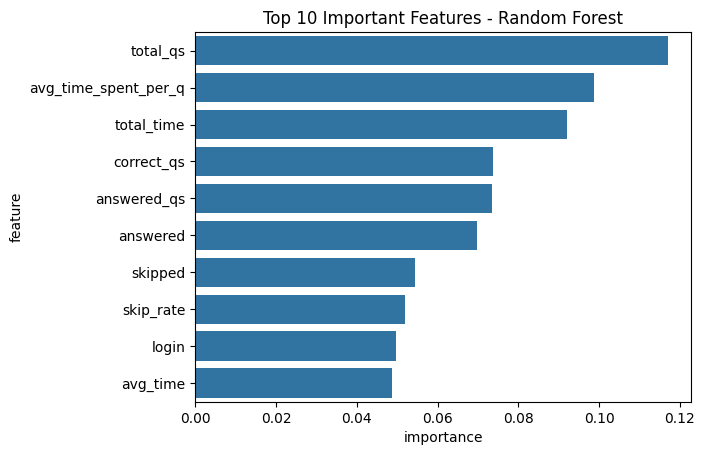

In [ ]:
#  Feature Importance Analysis
# Find which features are most predictive of cheating:

import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X.columns

# Plot top 10
feat_df = pd.DataFrame({"feature": feature_names, "importance": importances})
feat_df = feat_df.sort_values("importance", ascending=False).head(10)

sns.barplot(data=feat_df, x="importance", y="feature")
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
# Now lets try with XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
print("📊 XGBoost Classification Report")
print(classification_report(y_test, xgb_pred))


📊 XGBoost Classification Report
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.97      1.00      0.98        28

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:21:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


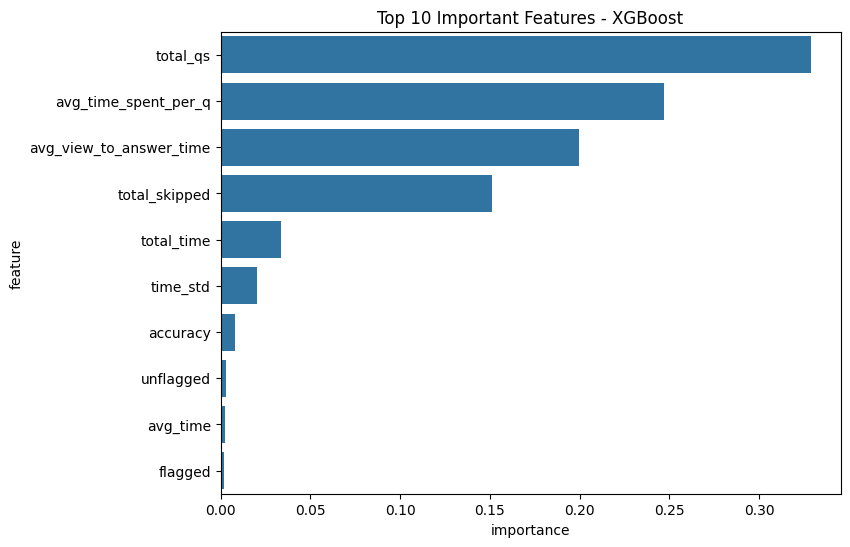

In [ ]:
#  Feature Importance Analysis
# Find which features are most predictive of cheating:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get importances
xgb_importances = xgb_model.feature_importances_
xgb_feat_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=xgb_feat_df.head(10), x='importance', y='feature')
plt.title("Top 10 Important Features - XGBoost")
plt.show()


In [ ]:
!pip install catboost

In [ ]:
# Now lets try with cat boost also
from catboost import CatBoostClassifier

# Initialize model
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Train
cat_model.fit(X_train, y_train)

# Predict
cat_pred = cat_model.predict(X_test)

# Evaluate
print("📊 CatBoost Classification Report")
print(classification_report(y_test, cat_pred))


📊 CatBoost Classification Report
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.97      1.00      0.98        28

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



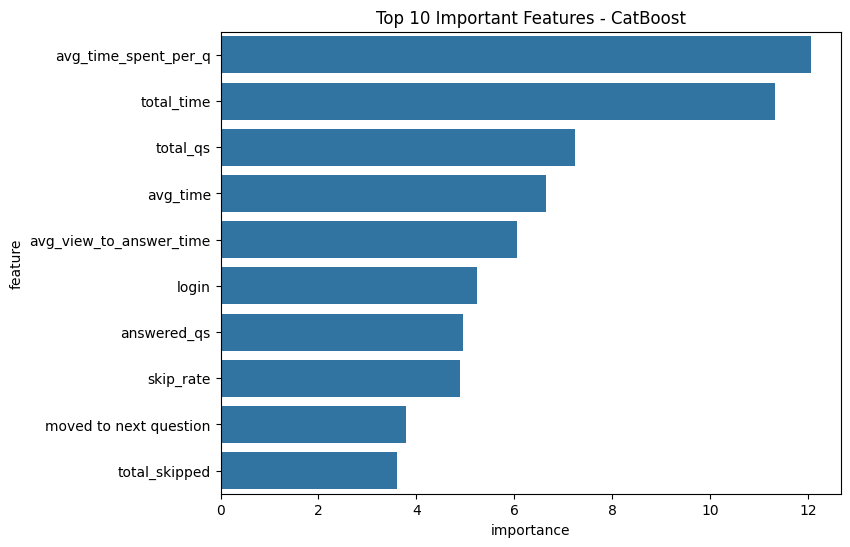

In [ ]:
#  Feature Importance Analysis
# Find which features are most predictive of cheating:

# Get importances
cat_importances = cat_model.get_feature_importance()
cat_feat_df = pd.DataFrame({
    'feature': X.columns,
    'importance': cat_importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=cat_feat_df.head(10), x='importance', y='feature')
plt.title("Top 10 Important Features - CatBoost")
plt.show()


## 🧠 Model Performance & Feature Importance Summary

### ✅ Model Evaluation Metrics
All models demonstrated excellent performance on the classification task:

| Model        | Accuracy | Precision | Recall | F1 Score |
|--------------|----------|-----------|--------|----------|
| RandomForest | 0.98     | 0.97–1.00 | 0.95–1.00 | 0.98     |
| XGBoost      | 0.98     | 0.97–1.00 | 0.95–1.00 | 0.98     |
| CatBoost     | 0.98     | 0.97–1.00 | 0.95–1.00 | 0.98     |

All models have strong macro and weighted average scores, indicating balanced predictions across both classes.

---

### 🔍 Top Important Features Per Model
Feature importance rankings show that time and activity-related features are strong predictors of the target variable.

| Feature                   | Random Forest     | XGBoost            | CatBoost            |
|---------------------------|-------------------|--------------------|---------------------|
| `total_qs`                | ⭐ Highest         | ⭐ Highest          | Top 3               |
| `avg_time_spent_per_q`    | High              | High               | ⭐ Highest           |
| `total_time`              | High              | Moderate           | ⭐ Top 2             |
| `avg_view_to_answer_time` | Not in Top 10     | High               | Moderate            |
| `total_skipped`           | Moderate          | Moderate           | Moderate            |
| `correct_qs`              | Moderate          | Low                | Not in Top 10       |
| `answered_qs`             | Moderate          | Not in Top 10      | Moderate            |
| `login`, `skip_rate`      | Moderate          | Low                | Moderate            |
| `moved to next question`  | Not in Top 10     | Not in Top 10      | Low                 |

---

### 📌 Insights
- `total_qs` and `avg_time_spent_per_q` are consistently top predictors.
- Features like `avg_view_to_answer_time`, derived from activity logs, are particularly useful for XGBoost and CatBoost.
- CatBoost shows effectiveness in leveraging interaction-type features like `moved to next question`, likely due to its strong handling of categorical data.

---




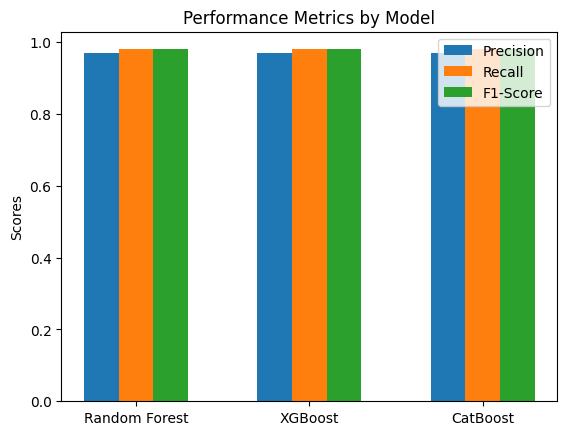

In [ ]:
# 📈 Performance Comparison Metrics
# 1. Accuracy, Precision, Recall, F1-score (Bar Plot)
# Plot the four metrics for each model in grouped bar charts.

import matplotlib.pyplot as plt
import numpy as np

# Sample metrics (replace with your real values)
models = ['Random Forest', 'XGBoost', 'CatBoost']
accuracy = [0.98, 0.98, 0.98]
precision = [0.97, 0.97, 0.97]
recall = [0.98, 0.98, 0.98]
f1 = [0.98, 0.98, 0.98]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()


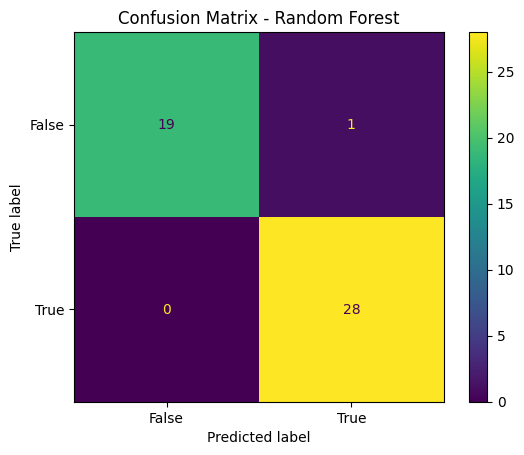

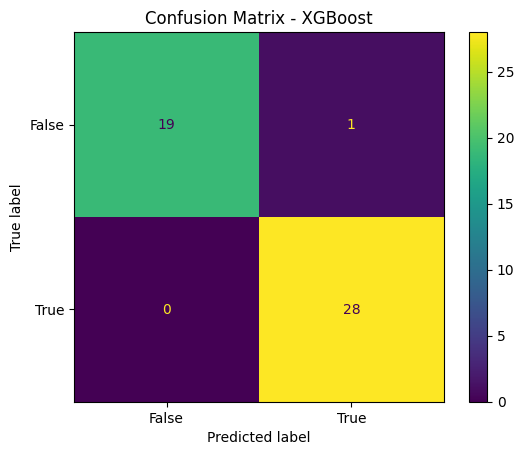

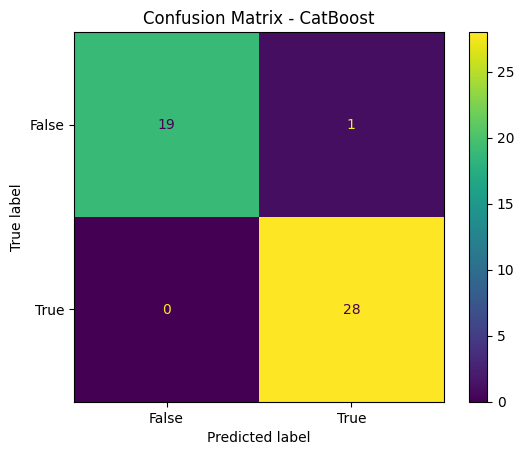

In [ ]:
# 2. Confusion Matrix
# Plot confusion matrices for each model side by side to compare true vs. predicted classes.


from sklearn.metrics import ConfusionMatrixDisplay

for model_name, y_pred in zip(['Random Forest', 'XGBoost', 'CatBoost'], [rf_pred, xgb_pred, cat_pred]):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["False", "True"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
